In [1]:
import pandas as pd
import numpy as np

In [2]:
dataframe = pd.read_csv('data/step2_output.csv')

In [3]:
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
dataframe.trestbps.value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1
123     1
200     1
Name: trestbps, dtype: int64

In [6]:
dataframe.chol.value_counts()

234    6
204    6
197    6
269    5
212    5
      ..
278    1
281    1
284    1
290    1
564    1
Name: chol, Length: 152, dtype: int64

In [8]:
dataframe.thalach.value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

<AxesSubplot:>

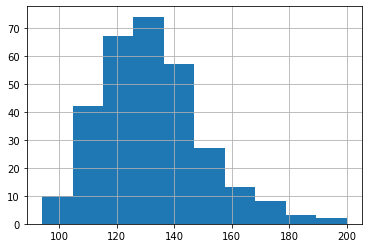

In [9]:
dataframe.trestbps.hist()

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

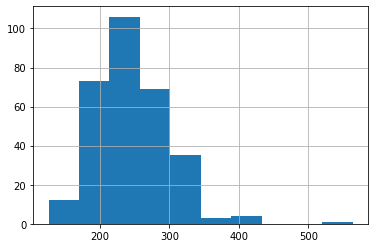

In [11]:
dataframe.chol.hist()

<AxesSubplot:>

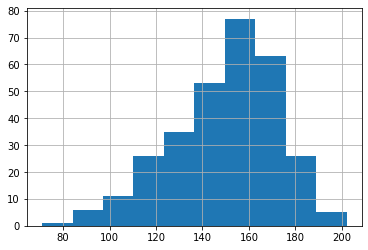

In [12]:
dataframe.thalach.hist()

In [14]:
def new_feature(row):
    magnitude = 1
    if(row <= 100):
        magnitude = 1
    elif(row > 100 and row <= 140):
        magnitude = 2
    elif(row > 140 and row <= 180):
        magnitude = 3
    else:
        magnitude = 4
        
    return magnitude

dataframe['trestbps_range'] = dataframe['trestbps'].apply(lambda x : new_feature(x))

In [15]:
dataframe['trestbps_range'].value_counts()

2    232
3     63
1      6
4      2
Name: trestbps_range, dtype: int64

In [16]:
dataframe['thalach_range'] = dataframe['thalach'].apply(lambda x : new_feature(x))

In [17]:
dataframe['thalach_range'].value_counts()

3    194
2     83
4     18
1      8
Name: thalach_range, dtype: int64

In [18]:
def new_feature_two(row):
    magnitude = 1
    if(row <= 200):
        magnitude = 1
    elif(row > 200 and row <= 300):
        magnitude = 2
    elif(row > 400 and row <= 500):
        magnitude = 3
    else:
        magnitude = 4
        
    return magnitude

dataframe['chol_range'] = dataframe['chol'].apply(lambda x : new_feature_two(x))

In [19]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

X = dataframe.drop(['target'],axis=1)
Y = dataframe['target']

In [22]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,trestbps_range,thalach_range,chol_range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,3,3,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,2,4,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,2,3,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,2,3,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,2,3,4


In [23]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [24]:
X_scaled = scaler.fit_transform(X)

In [26]:
new_scaled_dataframe = pd.DataFrame(X_scaled,columns=X.columns)

In [27]:
new_scaled_dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,trestbps_range,thalach_range,chol_range
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1.728131,0.440987,-0.126671
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,-0.435603,2.090603,-0.126671
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,-0.435603,0.440987,-0.126671
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,-0.435603,0.440987,-0.126671
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,-0.435603,0.440987,2.272167


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=47)

In [30]:
X_scaled_train,X_scaled_test,Y_scaled_train,Y_scaled_test = train_test_split(new_scaled_dataframe,Y,test_size=0.2,random_state=47)